In [11]:
# import packages
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 


print(tf.__version__)

2.4.0


In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

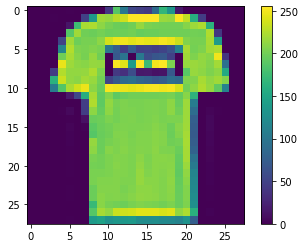

In [13]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# normalizing
x_train = x_train / 255.0
x_test = x_test / 255.0

# reshaping to add 1 
x_train  = x_train.reshape(60000, 28, 28, 1)
x_test  = x_test.reshape(10000, 28, 28, 1)

In [15]:
def train_mnist():
    class CustomCallback(tf.keras.callbacks.Callback):
        def on_train_end(self, logs=None):
            print("Reached trainig end returning model ")
    
    # creat the model 
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1), padding='valid',input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128 , activation = tf.nn.relu ),
        tf.keras.layers.Dense(10,  activation = tf.nn.softmax)
    ])

    # add the loss function and the optimizer for gradient descent 
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(
        x_train,
        y_train,
        epochs=30,
        callbacks=[CustomCallback()],
    )

    # model fitting
    return  model

In [6]:
model = train_mnist()

Epoch 1/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4971 - accuracy: 0.8233
Epoch 2/30
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2545 - accuracy: 0.9072
Epoch 3/30
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2036 - accuracy: 0.9248
Epoch 4/30
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1594 - accuracy: 0.9433
Epoch 5/30
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1298 - accuracy: 0.9527
Epoch 6/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1084 - accuracy: 0.9596
Epoch 7/30
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0944 - accuracy: 0.9654
Epoch 8/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0737 - accuracy: 0.9737
Epoch 9/30
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0638 - accuracy: 0.9762
Epoch 10/30
1875/1875 [==============================] - 29s 16m

In [7]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.8276 - accuracy: 0.9097

Test accuracy: 0.9096999764442444


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [9]:
predictions = model.predict(x_test)
label = np.argmax(predictions[1])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[label])

Pullover


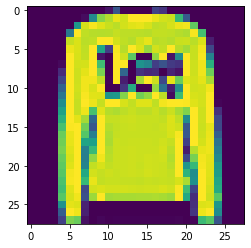

In [10]:
# Example of a picture
index = 1
plt.imshow(x_test[index])

In [3]:

def load_image(filename):
	# load the image
    img = cv2.imread(filename)
	# convert to array
    img = np.array(img)
    # reshape into a single sample with 1 channel
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # prepare pixel data
    img = img.astype('float32')
    # normalize the data 
    img = img / 255.0
    # return the image
    return img

In [4]:
def predict(img):
    # reshape the image
    img = np.expand_dims(img, axis=0)
    # predict the image lavel 
    label = model.predict(img)
    # return the prediction 
    return class_names[np.argmax(label)]

In [10]:
img = load_image('/Users/prashunjaveri/Desktop/dress_1.jpeg')
plt.imshow(img)
print(predict(img))

NameError: name 'model' is not defined

In [ ]:
# save the model 
def save_model(path):
    #save the model to path 
    model.save(path)

In [ ]:
def load_model(path):
    #load the model 
    new_model = tf.keras.models.load_model(path)
    # Check its architecture
    new_model.summary()
    #return the model
    return new_model

In [ ]:
save_model('./models/multi_class_image_classifier_cnn')

In [ ]:
model = load_model('./models/multi_class_image_classifier_cnn')

In [ ]:
def predict(img):
    # reshape the image
    img = img.reshape(1,28,28,1)
    # predict the image lavel 
    label = model.predict(img)
    # return the prediction 
    return class_names[np.argmax(label)]

In [ ]:
img = load_image('/Users/prashunjaveri/Desktop/boot.jpeg')
plt.imshow(img)
predict(img)

In [ ]:
def evaluate(root_dir):
    predictions = []
    predicted_labels = []
    file_names = [] 
    for root, dirs, files in os.walk(root_dir):
        for f in files:
            if f.split('.')[1] == 'jpeg' or f.split('.')[1] == 'png' :
                path = os.path.join(root_dir,f)
                file_names.append(f)
                img = load_image(path)
                label = predict(img)
                predictions.append(class_names.index(label))
                predicted_labels.append(label)
    return (file_names , predictions , predicted_labels )

In [ ]:
import pandas as pd 


def get_expected_labels(predictions):
    labels = []
    for p in predictions:
        labels.append(class_names[p])
    return  labels

def create_report(path, expected):
    predictions  = evaluate(path)
    expected = expected['predictions'].values
    expected_labels = get_expected_labels(expected)
    df = pd.DataFrame({
        'file':predictions[0] ,
        'predictions':predictions[1],
        'predicted_labels':predictions[2],
        'expected':expected,
        'expected_labels':expected_labels
        })

    total_number_of_files  = len(predictions[0])
    all_data = df.to_json(orient="split")
    
    all_df = df 

    comparison_column = np.where(all_df["predictions"] == all_df["expected"], True, False)
    all_df["equal"] = comparison_column

    df = all_df[all_df['equal'] == False]
    wrongly_identified_data = df.to_json(orient="split")
    no_of_wrongly_identified_files = len(df["file"].values)

    df = all_df[all_df['equal'] == True]
    correctly_identified_data = df.to_json(orient="split")

    percentage_error = 100 - (( total_number_of_files - no_of_wrongly_identified_files ) / total_number_of_files ) * 100
    return (all_data,wrongly_identified_data,correctly_identified_data,percentage_error)

In [ ]:
import json 

df = pd.DataFrame({ 'predictions': [3] })

all_rows,wrongly_identified,correctly_identified_data,percentage_error = create_report('/Users/prashunjaveri/Desktop/fashion_mnist', df)

def append_all_rows_to_result(all_rows,result):
    data = json.loads(all_rows)['data']
    columns = json.loads(all_rows)['columns']
    row_map = {}
    rows = [] 
    for row in data:
        for index,item in enumerate(row) :
            row_map[columns[index]] = item 
        rows.append(row_map)       
    result['all'] = rows
    return result 

def append_rows_with_errors_result(wrongly_identified,result):
    data = json.loads(wrongly_identified)['data']
    columns = json.loads(wrongly_identified)['columns']
    row_map = {}
    rows = [] 
    for row in data:
        for index,item in enumerate(row[0:len(row)-1]) :
            row_map[columns[index]] = item 
        rows.append(row_map)       
    result['errors'] = rows
    return result 

def append_rows_with_correct_result(correctly_identified_data,result):
    data = json.loads(correctly_identified_data)['data']
    columns = json.loads(correctly_identified_data)['columns']
    row_map = {}
    rows = [] 
    for row in data:
        for index,item in enumerate(row[0:len(row)-1]) :
            row_map[columns[index]] = item 
        rows.append(row_map)       
    result['correct'] = rows
    return result 

result = {}

def generate_report(result = {}):
    result = append_all_rows_to_result(all_rows,result)
    result = append_rows_with_errors_result(wrongly_identified,result)
    result = append_rows_with_correct_result(correctly_identified_data,result)
    result['percentage_error'] = percentage_error
    return result 

In [ ]:
result = json.dumps(generate_report({}), indent=4, sort_keys=True)
print(result)